<a href="https://colab.research.google.com/github/chaimoma/Classification-d-Images-avec-un-R-seau-Neuronal/blob/main/brief3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importation***

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

2-***Loading the data*** (***Charger Fashion MNIST via Tensorflow.keras.datasets.)***

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print('les classes en y_labels :',np.unique(train_labels))

les classes en y_labels : [0 1 2 3 4 5 6 7 8 9]


***2- Checking  shape and classes of data***

In [5]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


***3-Normaliser les pixels (diviser par 255 → valeurs dans [0,1])***.

In [6]:
#normalizing (scaling pixels form 0-255 to 0-1)
train_images=train_images  /255
test_images=test_images/255

print(train_images.shape, train_labels.shape)


(60000, 28, 28) (60000,)


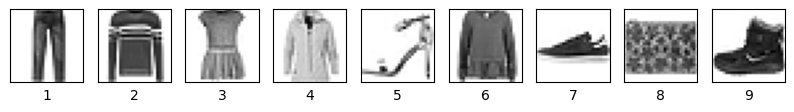

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10,2))

for i in range(1, 10):  # classes 1 to 9
    idx = (train_labels == i).nonzero()[0][0]  # first image of class i
    plt.subplot(1, 9, i)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(i)

plt.show()



***Construction du modèle***

In [8]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),   # 1
    layers.Dense(128, activation='relu'),  # 2
    layers.Dense(10, activation='softmax'),

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***compilation 'Before the model is ready for training'***

In [9]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


In [10]:
early_stop = EarlyStopping(
    monitor='val_loss',    # Watch the validation loss during training. This is what decides if training should stop early.
    patience=3,            # If the validation loss doesn’t improve for 3 consecutive epochs, stop the training.
    restore_best_weights=False  # After stopping, go back to the model weights that gave the best validation loss.
)


***Train the model but first we have te feed the training data to the model***

In [11]:
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=[early_stop])

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7714 - loss: 0.6582 - val_accuracy: 0.8537 - val_loss: 0.4126
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8582 - loss: 0.3953 - val_accuracy: 0.8673 - val_loss: 0.3721
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8713 - loss: 0.3518 - val_accuracy: 0.8666 - val_loss: 0.3785
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8804 - loss: 0.3228 - val_accuracy: 0.8783 - val_loss: 0.3373
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3031 - val_accuracy: 0.8813 - val_loss: 0.3246
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8946 - loss: 0.2837 - val_accuracy: 0.8797 - val_loss: 0.3310
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8981 - loss: 0.2730 - val_accuracy: 0.8862 - val_loss: 0.3223
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.2644 - 

***compare how the model performs on the test dataset:***

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 2s - 5ms/step - accuracy: 0.8791 - loss: 0.3471


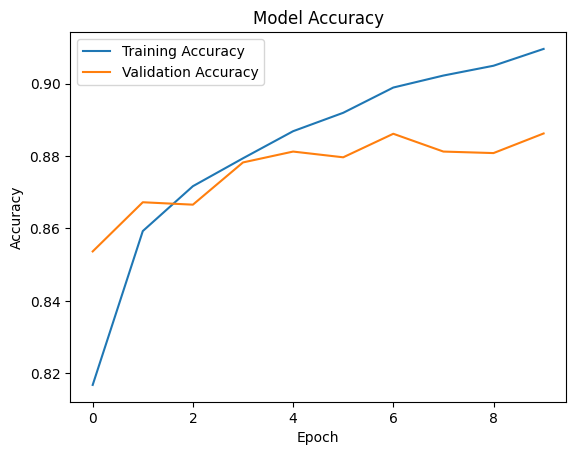

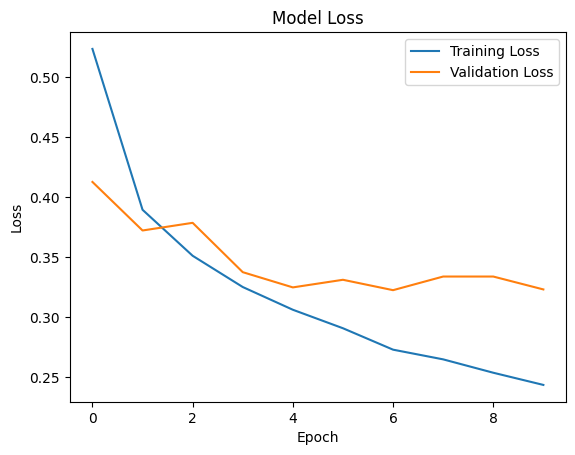

In [13]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
model.save('my_model.keras')